# Codeup Curriculum Anomaly Detection 

__Team:__ Daniel Ford, Joshua Mayes, Jared Angel

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
# from env import host, user, password

import acquire as aq
import prepare as pp
import warnings
warnings.filterwarnings('ignore')
import datetime

## Acquire and Clean

In [3]:
df = aq.wrangle_data()
df.head(3)

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,module,lesson
datetime,,,,,,,,,,,,
2018-01-26 09:55:03,97.105.19.61,/,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,None,None
2018-01-26 09:56:02,97.105.19.61,java-ii,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,java-ii,None
2018-01-26 09:56:05,97.105.19.61,java-ii/object-oriented-programming,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,java-ii,object-oriented-programming


### This Data was collected From the curriculum logs database on the codeup server

### this data contains: 847,329 observations under 11 categories

#### for cleaning we:
   - Converted select data types
   - Changed Index to Datetime
   - Streamlined select names
   - drrop unnecessary or duplicate columns
   



## Reports

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)? and 7. Which lessons are least accessed?

Starting with data science program first

In [4]:
# Eliminating the index homepage from lessons
trimmed = df[df.endpoint != '/']

In [5]:
#Making a dataframe for just data science students
datascience = trimmed.loc[trimmed.program_id == 3]

In [6]:
# Making dataframe grouped by cohort and lessons. Setting to descending order
ds_df = datascience.groupby('cohort_name').lesson.value_counts()
ds_df = ds_df.rename('total').reset_index()

In [7]:
#Creating a for loop to run through each cohort and get most popular and least popular lessons, adding to dictionary
ds_cohorts = ds_df.cohort_name.unique()
most_common_ds = {}
lest_com_ds = {}
for cohort in ds_cohorts:
    pop_lesson_ds = ds_df.loc[ds_df.cohort_name == cohort].lesson.iloc[0]
    no_lesson_ds = ds_df.loc[ds_df.cohort_name == cohort].lesson.iloc[-1]
    most_common_ds.update({cohort: pop_lesson_ds})
    lest_com_ds.update({cohort : no_lesson_ds})

In [8]:
# Making the dataframe from dictionary and renaming cols
most_com_ds = pd.DataFrame.from_dict(most_common_ds, orient='index')
most_com_ds.head()
most_com_ds.rename(columns = {'':'Cohort', 0:'Most Popular'}, inplace=True)

In [9]:
# Making dataframe for least popular lessons
lest_com_ds = pd.DataFrame.from_dict(lest_com_ds, orient='index')
lest_com_ds.head()
lest_com_ds.rename(columns = {'':'Cohort', 0:'less Popular'}, inplace=True)

In [10]:
# concatenating most and least along rows
ds_most_least = pd.concat([most_com_ds, lest_com_ds], axis=1)

In [11]:
ds_most_least

,Most Popular,less Popular
Bayes,1-overview,tableau
Curie,1-overview,www.opensecrets.org
Darden,overview,old_project
Easley,overview,working-with-time-series-data-with-pandas
Florence,modern-data-scientist.jpg,visualization-with-excel


Take aways:
-    The module 1 overview lesson accounted for 80% of the top lesson per cohort.
-    The least popular lesson was different for each cohort. However, opensecrets.org seems to be a counted as a lesson and could be wronly labeled

Full Stack PHP Program analysis

In [12]:
# Making df for just php program
PHPstack = trimmed.loc[trimmed.program_id == 1]

In [13]:
# Re arranging the data by cohort and lessons
PHP_df = PHPstack.groupby('cohort_name').lesson.value_counts()
PHP_df = PHP_df.rename('total').reset_index()

In [14]:
#Creating a for loop to run through each cohort and get most popular and least popular lessons, adding to dictionary
cohorts = PHP_df.cohort_name.unique()
lest_comm_php = {}
most_common_php = {}
for cohort in cohorts:
    lesson = PHP_df.loc[PHP_df.cohort_name == cohort].lesson.iloc[0]
    most_common_php.update({cohort: lesson})
    less_lesson_php = PHP_df.loc[PHP_df.cohort_name == cohort].lesson.iloc[-1]
    lest_comm_php.update({cohort : less_lesson_php})

In [15]:
#making most popular df
most_com_PHP = pd.DataFrame.from_dict(most_common_php, orient='index')
most_com_PHP.head()
most_com_PHP.rename(columns = {'':'Cohort', 0:'Most Popular'}, inplace=True)

In [16]:
#Making least popular df
lest_com_PHP = pd.DataFrame.from_dict(lest_comm_php, orient='index')

lest_com_PHP.rename(columns = {'':'Cohort', 0:'Least Popular'}, inplace=True)

In [17]:
# concatenating df1 and df2 along rows
php_most_least = pd.concat([most_com_PHP, lest_com_PHP], axis=1)

In [18]:
php_most_least

,Most Popular,Least Popular
Arches,fundamentals,units
Badlands,php_ii,introduction
Denali,databases,versioning
Franklin,es6,syntax-types-and-variables
Glacier,html-css,vocab
Hampton,fundamentals,working-in-teams
Ike,html-css,slides
Joshua,html-css,syntax-types-and-variables
Kings,laravel,slides
Lassen,fundamentals,working-in-teams


Take aways:
- The most common overall lesson for the full stack java program is the fundamentals lesson.
- The least most common overall are work-in-teams and syntax-types-and-variables

Full stack java program

In [19]:
# df just for java program
JAVAstack = trimmed.loc[trimmed.program_id == 2]

In [20]:
#Rearrange the java df
java_df = JAVAstack.groupby('cohort_name').lesson.value_counts()

In [21]:
# Reset index
java_df = java_df.rename('total').reset_index()

In [22]:
# making list of cohort names
j_cohorts = java_df.cohort_name.unique()

In [23]:
#Creating a for loop to run through each cohort and get most popular and least popular lessons, adding to dictionary
lest_com_j = {}
most_common_j = {}
for cohort in j_cohorts:
    lesson_j = java_df.loc[java_df.cohort_name == cohort].lesson.iloc[0]
    lest_lesson_j = java_df.loc[java_df.cohort_name == cohort].lesson.iloc[-1]
    most_common_j.update({cohort: lesson_j})
    lest_com_j.update({cohort : lest_lesson_j})

In [24]:
# Making most common df
most_common_java = pd.DataFrame.from_dict(most_common_j, orient='index')
most_common_java.rename(columns = {'':'Cohort', 0:'Most Popular'}, inplace=True)

In [25]:
#making least common df
lest_com_java = pd.DataFrame.from_dict(lest_com_j, orient='index')
lest_com_java.rename(columns = {'':'Cohort', 0:'Least Popular'}, inplace=True)

In [26]:
# concatenating df1 and df2 along rows
java_most_least = pd.concat([most_common_java, lest_com_java], axis=1)

In [27]:
java_most_least

,Most Popular,Least Popular
Andromeda,fundamentals,twitter.html
Apex,css-i,user_input
Bash,fundamentals,professionalism-101
Betelgeuse,introduction,syntax_types_and_variables
Ceres,css-i,workbook
Deimos,css-i,t-block-resume
Europa,css-i,mock-behavioral-questions
Fortuna,css-i,syntax_types_and_variables
Ganymede,css-i,typography
Hyperion,introduction,sessions_and_cookies


Take aways:
-   The most common lessons for the full stack java program are fundamentals and introduction
-   The lest most common lessones are whack-a-mole and workbook

Frontend program

In [28]:
#Making front end df
Frontend = trimmed.loc[trimmed.program_id == 4]

In [29]:
# sorting by cohort and lesson
fe_df = Frontend.groupby('cohort_name').lesson.value_counts()

In [30]:
fe_df

cohort_name  lesson  
Apollo       html-css    4
Name: lesson, dtype: int64

Take away:
-   The data is only available for one cohort and the data only shows the html-css lesson
-   Could not determine most and least from current data

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

Because this question likely is trying to glean information about how each cohort was taught, it's best to filter down the data to only include the kind of information we want.

In [49]:
# Filter the dataset down to only current students
current_student = (df.index > df.start_date) & (df.index < df.end_date)
current = df[current_student]

# Filter further to only include java modules since they were the easiest to pick out
current.dropna(subset='module')
mods = current.module.unique().tolist()
mods.remove(None)
mods = [col for col in mods if 'java-' in col]
current = current[current.module.isin(mods)]

# Another filter to reduce noise
current= current[current.program !='Data Science']
current = current[current.module != 'java-1']

From there we can get a sort of picture of how cohorts interacted with the modules by doing a simple grouped value counts.

In [50]:
# Show popularity of java modules per cohort
a = current.groupby('cohort_name').module.value_counts().rename('vcount')
a

cohort_name  module  
Andromeda    java-iii    1612
             java-ii     1497
             java-i      1097
Apex         java-ii     2523
             java-iii    2328
                         ... 
Yosemite     java-ii     1243
             java-i       946
Zion         java-ii     2645
             java-iii    2571
             java-i      2110
Name: vcount, Length: 72, dtype: int64

<Figure size 1080x720 with 0 Axes>

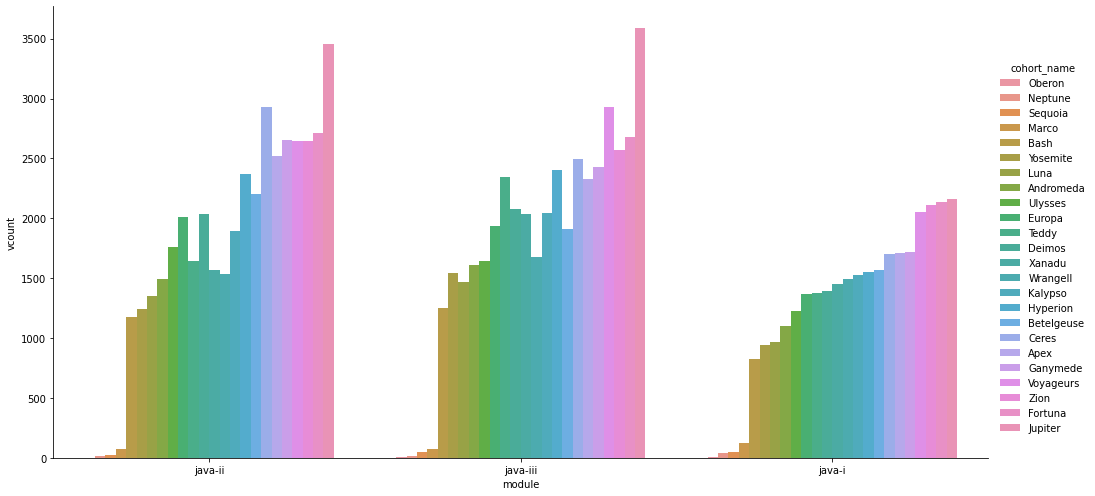

In [53]:
a = a.reset_index() # Prepare for plotting
plt.figure(figsize=(15,10))
sns.catplot(kind= 'bar', data=a.sort_values(by='vcount'), x='module', y='vcount', hue='cohort_name', height=7, aspect=2)

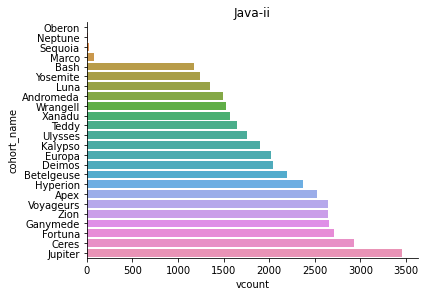

In [54]:
sns.catplot(kind= 'bar', data=a[a.module=='java-ii'].sort_values(by='vcount'), y='cohort_name', x='vcount', height=4, aspect=1.5).set(title='Java-ii')

#### Takeaways:
The java modules had the highest variance between cohorts.  Oberon, Neptune, and Sequoia seemed to barely access these modules.

### 3. Are there students who, when active, hardly access the curriculum? 

### If so, what information do you have about these students?

In [31]:
# Gathers students wo were currently in the program at the time of access
students = pp.filter_students(df)

In [32]:
students.head(1)

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,module,lesson,date_mask
datetime,,,,,,,,,,,,,
2019-11-04 16:54:38,97.105.19.58,html-css/introduction,539.0,52.0,Europa,#europa,2019-11-04 00:00:00,2020-04-17 00:00:00,2.0,Full Stack Java,html-css,introduction,True


#### Takeaways:
   
   - The User IDs of students that accessed the curriculum the least are
       - 679.0
       - 812.0
       - 941.0
       - 956.0
       - 539.0
       - 572.0
   
   
   - 6 students respectively accessed the data less than 10 times while enrolled at codeup
       - of those 6 students: - 
           - 1 was enrolled in Data Science
           - 5 were enrolled in Full Stack Java
       - the Data Science student accessed the curriculum 10 times
       - the FS JAVA accessed the curriculum 20 times, with a median of 3
       
       
   - the least accessed modules were: 
       - Data Science; advanced topics 
       - FS JAVA; appendix

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? 

<!-- ### Does it appear that any web-scraping is happening?  -->

### Are there any suspicious IP addresses?

#### Detecting suspicious activity using IP geolocation.

By collecting IP address location information from a public API, we were able to gather additional information about how users were accessing CodeUp's cirruculum.

In [33]:
import ip_tk

In [34]:
# Use a helper utility to merge ip information into the dataframe
df = ip_tk.wrangle_ip_merged()

In [35]:
# Show off the kind of information collected
df[['user_id','ip','city','regionName','countryName','latitude','longitude']].sample(5, random_state = 8)

,user_id,ip,city,regionName,countryName,latitude,longitude
datetime,,,,,,,
2020-10-26 11:55:53,769,98.197.56.20,Houston,Texas,United States,29.7912,-95.4182
2019-01-15 11:06:19,267,97.105.19.58,Euless,Texas,United States,32.8548,-97.0819
2018-08-07 13:10:12,40,97.105.19.58,Euless,Texas,United States,32.8548,-97.0819
2021-02-14 12:39:19,788,173.175.108.125,San Antonio,Texas,United States,29.4551,-98.6498
2020-10-17 23:20:16,668,70.94.168.22,San Antonio,Texas,United States,29.4812,-98.3435


Now, because we have both a timestamp and location information associated with each log entry, we are able to see if anyone is moving around the world impossibly fast.

As an example of how we can use this information, we can ask if anyone was in multiple countries within the same hour.

In [36]:
# Get geohopping events by the hour
ip_tk.detect_country_geohop_events(df, window='1H', group_by='user_id')

,when_start,when_end,where,user_id
0,2020-02-15 00:00:00,2020-02-15 01:00:00,"[Mexico, United States]",64
1,2018-07-28 11:00:00,2018-07-28 12:00:00,"[United States, Canada]",128
2,2018-07-29 16:00:00,2018-07-29 17:00:00,"[United States, Canada]",128
3,2019-01-11 09:00:00,2019-01-11 10:00:00,"[Germany, United States]",270
4,2019-01-14 09:00:00,2019-01-14 10:00:00,"[United States, Germany]",270
5,2019-12-08 12:00:00,2019-12-08 13:00:00,"[Germany, Australia]",469
6,2019-12-12 10:00:00,2019-12-12 11:00:00,"[Australia, United States]",469
7,2019-12-16 10:00:00,2019-12-16 11:00:00,"[Canada, United States]",469
8,2020-01-03 21:00:00,2020-01-03 22:00:00,"[Canada, United States]",469
9,2020-04-16 16:00:00,2020-04-16 17:00:00,"[Switzerland, United States]",570


This is symptomatic evidence of leaked credentials.  It is also possible that some users used VPNs to tunnel their traffic from different countries, but these events should be taken seriously nonetheless.

An small window, such as a single hour, gives us very confident results.  It is very unlikely that any of these users could travel between these countries so quickly.  However, the small window means that we miss out on attacks that may have happened during off hours or weekends.  To compensate for that we can ask the same question with a larger window.

In [37]:
# Get geohopping events by the week
ip_tk.detect_country_geohop_events(df, window='1W', group_by='user_id')

,when_start,when_end,where,user_id
0,2018-04-01,2018-04-08,"[United States, Mexico]",3
1,2018-04-08,2018-04-15,"[United States, Mexico]",3
2,2018-04-01,2018-04-08,"[United States, Germany]",12
3,2020-02-02,2020-02-09,"[Canada, United States]",12
4,2018-04-22,2018-04-29,"[United States, Canada, France]",32
5,2018-03-11,2018-03-18,"[United States, Mexico]",64
6,2019-08-04,2019-08-11,"[United States, Mexico]",64
7,2019-12-01,2019-12-08,"[United States, Canada]",64
8,2019-12-22,2019-12-29,"[United States, Mexico]",64
9,2020-01-19,2020-01-26,"[United States, Mexico]",64


#### Takeaways
There is very strong evidence to suggest that some users may have compromised credentials.

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. 

### Do you see any evidence of that happening? Did it happen before?

## Confirming the access policy change in 2019

The data that we have access to does not include if a user is accessing a lesson that they are supposed to have access to.  In order to answer this question we will need to improvise.

An assumption can be made that a module belongs to the program where the users belonging to that program access it the most.  In order to tackle this question we will be making that assumption.

In [38]:
def build_module_parent_df(df):
    # Group by module and get the number of accesses for each program
    mod_prog = df.groupby('module').program.value_counts()
    # Flatten the result 
    a = mod_prog.rename('vcount').reset_index()
    out = {}
    for i, mod in enumerate(a.module.unique().tolist()):
        this = a[a.module == mod]
        out[i] = {'module':mod, 'module_parent':this.set_index('program').vcount.idxmax()}

    return pd.DataFrame.from_dict(out, orient='index')

In [39]:
parents = build_module_parent_df(df)
parents.sample(15, random_state=42)

,module,module_parent
286,8.05_Deliver,Full Stack Java
652,studentx,Full Stack Java
257,7-clustering,Full Stack Java
336,Classification_KNN,Full Stack Java
318,9_Appendix_TSAD_Lesson2,Full Stack Java
211,5.01_Acquire,Full Stack Java
621,sample-database,Full Stack Java
176,3.5.3-limit,Full Stack Java
576,mvc,Full Stack Java
256,7-classification,Data Science


However, if we take a critical look at the module/parent assignments we can determine that the assumption quickly falls apart.  As a student in the Data Science program, I know that modules such as Acquire, Prepare, Explore, and Model are all not supposed to be assigned to the Full Stack Java program.

In [40]:
# Show an example of erroneously classified modules.
selection = ['10.01_Acquire_WebScraping',
'10.3_Acquire',
'10.4_Prepare',
'10.5_Explore',
'10.6_Model',
'10._NLP',
'Index.html']

parents[parents.module.isin(selection)]

,module,module_parent
27,10.01_Acquire_WebScraping,Full Stack Java
40,10.3_Acquire,Full Stack Java
41,10.4_Prepare,Full Stack Java
42,10.5_Explore,Full Stack Java
43,10.6_Model,Full Stack Java
44,10._NLP,Full Stack Java
357,Index.html,Data Science


However, it is better than nothing. So we will try to use what we have and set ourselves up to be able to visualize the rate of unauthorized access logs.

In [41]:
# Set merge the module/parent data with the main dataframe, but store the result in a new variable to avoid conflicts with the rest of the notebook.
xf = df.reset_index().merge(parents, how='left', on='module').set_index('datetime')
# Get rid of any nulls for the purposes of 
xf = xf.dropna(subset=['module', 'module_parent', 'program_id'])

# Group the full stack programs together since we expect overlap.
xf.loc[xf.program.str.contains('Full Stack'), 'program'] = 'Full Stack'
xf.loc[xf.module_parent.str.contains('Full Stack'), 'module_parent'] = 'Full Stack'

# Create a new column that determines if this access record should have been able to access the page
xf['unauth_acc'] = xf.program != xf.module_parent

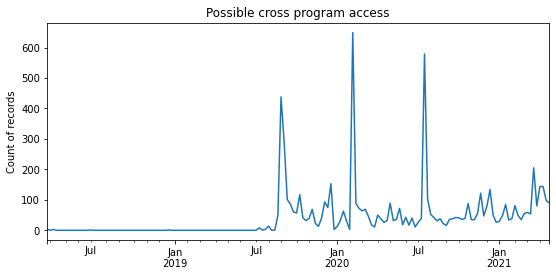

In [42]:
plt.figure(figsize=(9,4))
xf[xf.unauth_acc  & (xf.cohort_name != 'Staff')].unauth_acc.resample('W').sum().plot()
plt.title('Possible cross program access')
plt.ylabel('Count of records')
plt.xlabel(None)
plt.show()

### Takeaways:
While we don't have enough data to confirm the effectiveness of the policy change.  We can clearly see that there was a policy change that occured sometime around July 2019

### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [43]:
# Filters graduates from current students and seperates by program
java, php, data_sci, f_end = pp.filter_grads(df)

In [44]:
java.head(2)

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,...,delay,city,regionCode,regionName,countryCode,countryName,continentName,latitude,longitude,mask
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-26 11:36:38,97.105.19.61,javascript-i/functions,26.0,18.0,Pinnacles,#pinnacles,2017-03-27 00:00:00,2017-07-20 00:00:00,2.0,Full Stack Java,...,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819,True
2018-01-26 13:57:51,97.105.19.61,spring/extra-features/file-upload,40.0,16.0,Niagara,#niagara,2016-10-26 00:00:00,2017-03-09 00:00:00,2.0,Full Stack Java,...,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819,True


In [45]:
php.head(2)

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,...,delay,city,regionCode,regionName,countryCode,countryName,continentName,latitude,longitude,mask
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-26 09:56:05,97.105.19.61,java-ii/object-oriented-programming,1.0,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,...,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819,True
2018-01-26 09:56:06,97.105.19.61,slides/object_oriented_programming,1.0,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,...,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819,True


In [46]:
data_sci.head(2)

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,...,delay,city,regionCode,regionName,countryCode,countryName,continentName,latitude,longitude,mask
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-30 08:01:31,97.105.19.58,1-fundamentals/1.1-intro-to-data-science,485.0,34.0,Bayes,#,2019-08-19 00:00:00,2020-01-30 00:00:00,3.0,Data Science,...,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819,True
2020-01-30 08:01:32,97.105.19.58,1-fundamentals/modern-data-scientist.jpg,485.0,34.0,Bayes,#,2019-08-19 00:00:00,2020-01-30 00:00:00,3.0,Data Science,...,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819,True


In [47]:
f_end.head(2)

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,...,delay,city,regionCode,regionName,countryCode,countryName,continentName,latitude,longitude,mask
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-22 19:01:54,207.68.209.17,content/html-css,152.0,9.0,Apollo,#apollo,2015-03-30 00:00:00,2015-07-29 00:00:00,4.0,Front-End,...,1ms,Arcadia,NE,Nebraska,US,United States,North America,41.4252,-99.1208,True
2018-03-22 19:01:54,207.68.209.17,content/html-css/gitbook/images/favicon.ico,152.0,9.0,Apollo,#apollo,2015-03-30 00:00:00,2015-07-29 00:00:00,4.0,Front-End,...,1ms,Arcadia,NE,Nebraska,US,United States,North America,41.4252,-99.1208,True


### There are 568 unique graduates by ID
#### of those 568, 48 are staff
#### staff was removed as it may bias the data


| **Programs**    	| **Top Module** 	| **Amount Accessed** 	| **Top Lessons**       	| **Amount accessed** 	|
|:-----------------	|:----------------	|:---------------------:	|:-----------------------	|:---------------------:	|
| Full Stack JAVA 	| Spring         	|         7270        	| Fundamentals          	|         5400        	|
|                 	| Javascrip      	|         6725        	| Introduction          	|         2981        	|
|                 	| HTML-CSS       	|         4850        	| Search_index.json     	|         2370        	|
| Full Stack PHP  	| Content        	|         6397        	| Fundamentals          	|         1442        	|
|                 	| Javascript-I   	|         2972        	| Laravel               	|         1188        	|
|                 	| HTML-CSS       	|         1921        	| Introduction          	|         1156        	|
| Data Science    	| Fundementals   	|         1053        	| Overview              	|         674         	|
|                 	| SQL            	|         1046        	| Search_index.json     	|         493         	|
|                 	| Classification 	|         1036        	| AI-ML-DL-timeline.jpg 	|         316         	|
| Front End       	| Content        	|          4          	| HTML-CSS              	|          4          	|